In [1]:
import xtrack as xt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker
import xpart as xp
import yaml
import matplotlib.patches as patches

def plotLatticeSeries(ax, twiss, element_name, series, height=1., v_offset=0., color='r',alpha=0.5):
    aux=series
    ax.add_patch(
    patches.Rectangle(
        (twiss_b1['s', element_name]-aux['length']*0, v_offset-height/2.),   # (x,y)
        aux['length'],          # width
        height,          # height
        color=color, alpha=alpha
    )
    )
    return;

In this snippet we will look at the optics quantities of the `ARC`.

The big difference with respect to the previous snippet is that we will use the `twiss` method: in this case the reference system is the one of the beam.
This is the reference system that is used in the vast majority of the cases.

Our task is to understand how the twiss quantities can be retrieved and to see how the LHC arc works.

We start by loading the collider from the json file, as always. Then we call the twiss method on the lhcb1 line.

In [2]:
collider = xt.Multiline.from_json('../data/collider.json')
collider.build_trackers()
my_dict = collider.lhcb1.to_dict()

Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...
Done compiling ContextCpu kernels.


In [3]:
twiss_b1 = collider['lhcb1'].twiss()

We can see, for example, the columns of the twiss dataframe, which contain several important quantities.

In [4]:
print(twiss_b1.cols)
print('The beta functions are', twiss_b1['betx'], twiss_b1['bety'])
print('The names of the elements are ', twiss_b1['name'])

<name s x px y py zeta delta ptau betx bety alfx alfy gamx gamy dx dpx dy dpy dx_zeta dy_zeta betx1 bety1 betx2 bety2 mux muy muzeta nux nuy nuzeta W_matrix dzeta dmux dmuy>
The beta functions are [121.56685712 121.56685712  49.91606224 ... 219.9589056  121.56685944
 121.56685944] [218.58364143 218.58364143 340.12636401 ... 135.87219848 218.58385168
 218.58385168]
The names of the elements are  ['ip3' 'drift_0' 'mcbwv.4r3.b1_entry' ... 'drift_6653' 'lhcb1ip3_p_'
 '_end_point']


Now we can plot the beta functions in the ARC together with dipole and quadrupole magnets.
The convention is the following:
- The `dipole` magnets are in `blue`;
- The `quadrupole` magnets are in `red`;
The height of the each element is proportional to the integrated strength of the element.
We are now going to look at `ARC34` .

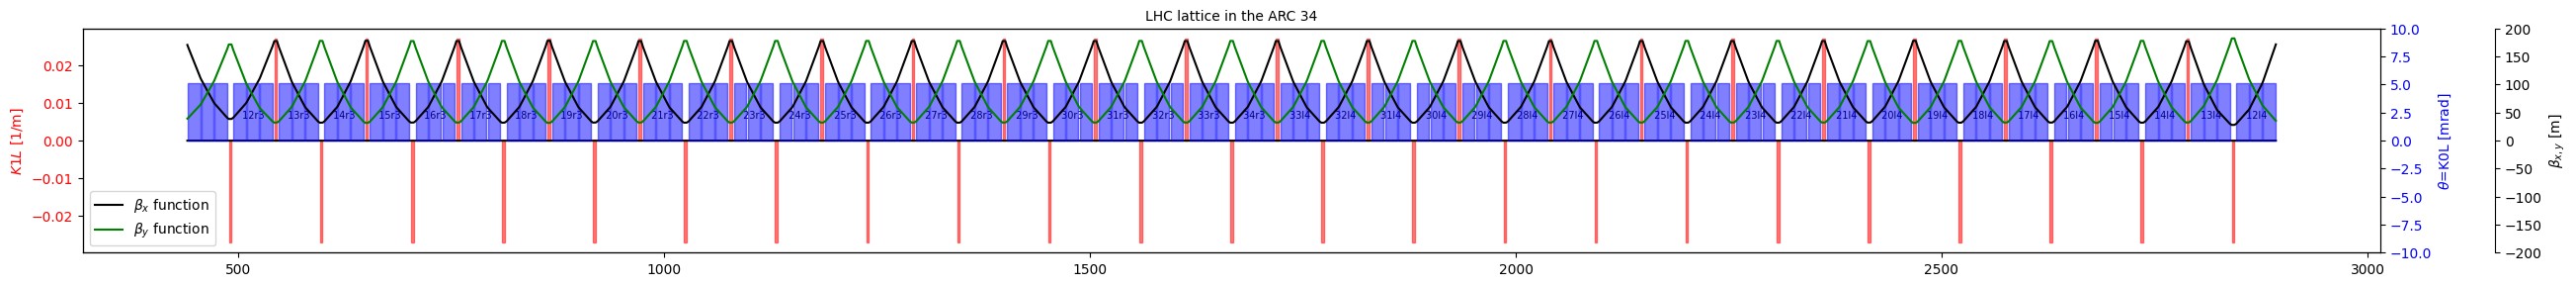

In [5]:

fig = plt.figure(figsize=(30,10))
fontsize = 10
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3, rowspan=1)
plt.plot(twiss_b1.rows['s.arc.34.b1':'e.arc.34.b1', ]['s'],
         0*twiss_b1.rows['s.arc.34.b1':'e.arc.34.b1', ]['s'],'k')
for ii in (twiss_b1.rows['s.arc.34.b1':'e.arc.34.b1', ]['name']):
    if((ii.startswith('mq.')) and ii.endswith('b1')):
        aux =my_dict['elements'][ii]
        k1l = my_dict['elements'][ii]['k1']*my_dict['elements'][ii]['length']
        #print(ii, k1l)
        plotLatticeSeries(plt.gca(),twiss_b1, ii, aux, height=k1l, v_offset=k1l/2, color='red')
        # add a label for each quadrupole on top of it with its name
        name = ' '+ii.split('.')[1]+' '
        plt.gca().text(twiss_b1['s', ii]+28.6, np.abs(k1l)/4, 
                       name, fontsize=7, color='k', horizontalalignment='center', verticalalignment='center')
ax1.set_ylabel(r'$K1L$ [1/m]', color='red')
ax1.tick_params(axis='y', labelcolor='red')
FODO_cell_length = twiss_b1['s','mq.28l2.b1']-twiss_b1['s','mq.30l2.b1']
ax2 = ax1.twinx() 
ax2.set_ylim(-10,10)
for ii in (twiss_b1.rows['s.arc.34.b1':'e.arc.34.b1', ]['name']):
    if((ii.startswith('mb.')) and ii.endswith('b1')):
        aux =my_dict['elements'][ii]
        kl = my_dict['elements'][ii]['k0']*my_dict['elements'][ii]['length']
        plotLatticeSeries(plt.gca(),twiss_b1, ii, aux, height=kl*1000, v_offset=kl/2*1000, color='blue')
color = 'blue'
ax2.set_ylabel(r'$\theta$=K0L [mrad]', color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('LHC lattice in the ARC 34', fontsize = fontsize)
plt.xlabel('s [m]', fontsize = fontsize)
color = 'k'
ax3 = ax1.twinx() 
ax3.set_ylim(-200,200)
ax3.spines.right.set_position(("axes", 1.05))
plt.gca().plot(twiss_b1.rows['s.arc.34.b1':'e.arc.34.b1', ]['s'],
               twiss_b1.rows['s.arc.34.b1':'e.arc.34.b1', ]['betx'],'k',label=r'$\beta_{x}$ function')
plt.gca().plot(twiss_b1.rows['s.arc.34.b1':'e.arc.34.b1', ]['s'],
               twiss_b1.rows['s.arc.34.b1':'e.arc.34.b1', ]['bety'],'green',label=r'$\beta_{y}$ function')

ax3.set_ylabel(r'$\beta_{x,y}$ [m]', color=color)
ax3.tick_params(axis='y', labelcolor=color)
plt.legend(fontsize = fontsize)

First of all some basic comments:
- An LHC `FODO` cell is defined from a defocusing quadrupole to the next defocusing quadrupole and it's length is 106.9 m;
- There are `23 FODO cells in an ARC`;
- Each `dipole kicks` by `5mrad`, so that, with 1232 dipoles around the machine, we get to 2pi (a circle);
- The `beta function` should be a `periodic` function, and this is (almost) the case;
- The beta function in x is opposite to the beta function in y, as expected since the 
`FODO cell focuses in one plane and defocuses in the other`;
Then some questions:
- `All the quadrupoles have the same integrated strength` (absolute value), but the beta function is not the same in all the FODO cells (look at the first and the last cell). Why?
- It is easy to predict the dipolar kick (we must make a circle), but what about the quadrupolar kick? How can we predict it?

The first question requires a bit of knowledge on the ARC and how it is controlled. 

Each ARC is powered by a `single power supply`, therefore all the quadrupoles in the ARC have the same integrated strength.
When multiple components of the machine need to be controlled all together we use something called `knob`. By changing the value of a
knob we can do several things. For example some knobs change the `crossing angle` at the IP, others help us with the `chromaticity` and so on.
By printing out the elements in the ARC you can discover something interesting, some `trim` quadrupoles (mqt):

In [6]:
for ii in (twiss_b1.rows['s.arc.34.b1':'mq.19r3.b1', ]['name']):
    if((ii.startswith('mqt.')) and ii.endswith('b1')):
        aux =my_dict['elements'][ii]
        k1l_t = my_dict['elements'][ii]['k1']*my_dict['elements'][ii]['length']
        print('Name: ',ii,',k1L: ', k1l_t)

Name:  mqt.12r3.b1 ,k1L:  0.00096377579775688
Name:  mqt.13r3.b1 ,k1L:  -0.0010851318579824516
Name:  mqt.14r3.b1 ,k1L:  -8.403669711554023e-05
Name:  mqt.15r3.b1 ,k1L:  -3.333926562941485e-05
Name:  mqt.16r3.b1 ,k1L:  -8.403669711554023e-05
Name:  mqt.17r3.b1 ,k1L:  -3.333926562941485e-05
Name:  mqt.18r3.b1 ,k1L:  -8.403669711554023e-05
Name:  mqt.19r3.b1 ,k1L:  -3.333926562941485e-05


You can see that the first two (and try to repeat the exercise for the last two) have a different integrated strength!

This is because the first (and last) are use to match the beta function at the entrance (and exit) of the ARC.
All the other ones are controlled by the following knobs:

In [7]:
# Defocusing quadrupoles
print(collider.vars['kqtd.a34b1']._find_dependant_targets())
# Focusing quadrupoles
print(collider.vars['kqtf.a34b1']._find_dependant_targets())

[vars['kqtd.a34b1'], eref['lhcb1']['mqt.18l4.b1'].k1, eref['lhcb1']['mqt.16r3.b1'].k1, eref['lhcb1']['mqt.14r3.b1'], eref['lhcb1'], eref['lhcb1']['mqt.14l4.b1'], eref['lhcb1']['mqt.18l4.b1'], eref['lhcb1']['mqt.18r3.b1'], eref['lhcb1']['mqt.16l4.b1'].k1, eref['lhcb1']['mqt.20l4.b1'], eref['lhcb1']['mqt.16r3.b1'], eref['lhcb1']['mqt.20r3.b1'], eref['lhcb1']['mqt.16l4.b1'], eref['lhcb1']['mqt.14r3.b1'].k1, eref['lhcb1']['mqt.14l4.b1'].k1, eref['lhcb1']['mqt.20l4.b1'].k1, eref['lhcb1']['mqt.20r3.b1'].k1, eref['lhcb1']['mqt.18r3.b1'].k1]
[vars['kqtf.a34b1'], eref['lhcb1']['mqt.15l4.b1'].k1, eref['lhcb1']['mqt.17l4.b1'], eref['lhcb1']['mqt.17r3.b1'], eref['lhcb1']['mqt.21l4.b1'].k1, eref['lhcb1']['mqt.19r3.b1'], eref['lhcb1'], eref['lhcb1']['mqt.21r3.b1'].k1, eref['lhcb1']['mqt.15l4.b1'], eref['lhcb1']['mqt.21l4.b1'], eref['lhcb1']['mqt.15r3.b1'], eref['lhcb1']['mqt.21r3.b1'], eref['lhcb1']['mqt.19l4.b1'], eref['lhcb1']['mqt.19l4.b1'].k1, eref['lhcb1']['mqt.17l4.b1'].k1, eref['lhcb1']['mqt.

The first two are controlled by the following knobs (and you can guess the knobs for the last two):

In [8]:
print(collider.vars['kqt12.r3b1']._find_dependant_targets())
print(collider.vars['kqt13.r3b1']._find_dependant_targets())

[vars['kqt12.r3b1'], eref['lhcb1'], eref['lhcb1']['mqt.12r3.b1'].k1, eref['lhcb1']['mqt.12r3.b1']]
[vars['kqt13.r3b1'], eref['lhcb1'], eref['lhcb1']['mqt.13r3.b1'].k1, eref['lhcb1']['mqt.13r3.b1']]


Now we can try to answer the second question.
Two things are important to understand: 
- We want a stable lattice;
- We want a reasonable beta function, so that the beam size is not too big;
If we plot the stability condition for the FODO cell we get the following:

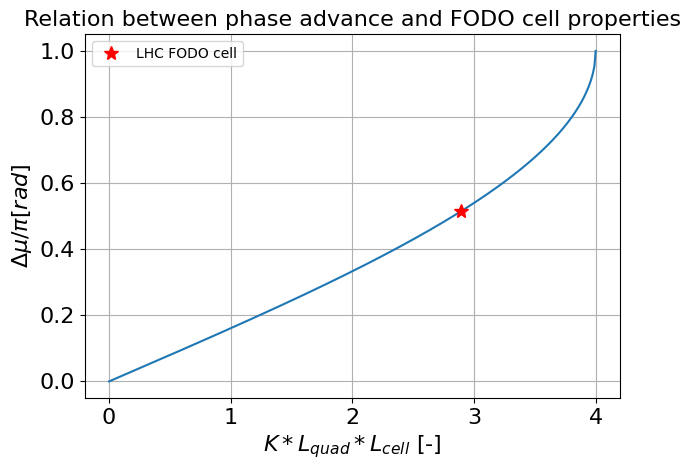

In [9]:
x= np.arange(0,4.01,0.01)
y=2*np.arcsin(x/4)/np.pi
FODO_cell_length = twiss_b1['s','mq.28l2.b1']-twiss_b1['s','mq.30l2.b1']
LHCFODO = np.abs(k1l)*FODO_cell_length
y_LHC = 2*np.arcsin(LHCFODO/4)/np.pi
fig, ax1 = plt.subplots()
ax1.plot(x,y,'-')
ax1.set_ylabel("$\Delta \mu / \pi [rad]$", fontsize=16)
ax1.set_xlabel("$K*L_{quad}*L_{cell}$ [-]", fontsize=16)
ax1.grid()
ax1.tick_params(axis='both', labelsize=16)
phase_advance = np.abs((twiss_b1['mux','mq.30l2.b1']-twiss_b1['mux','mq.28l2.b1']))
ax1.plot(LHCFODO, y_LHC, '*', markersize=10, color='red', label='LHC FODO cell')
ax1.set_title('Relation between phase advance and FODO cell properties', fontsize=16)
ax1.legend(fontsize=10)
plt.tight_layout()

So the LHC FODO cell provides a pi/2 phase advance.

For the second condition we want to calculate the beta function 

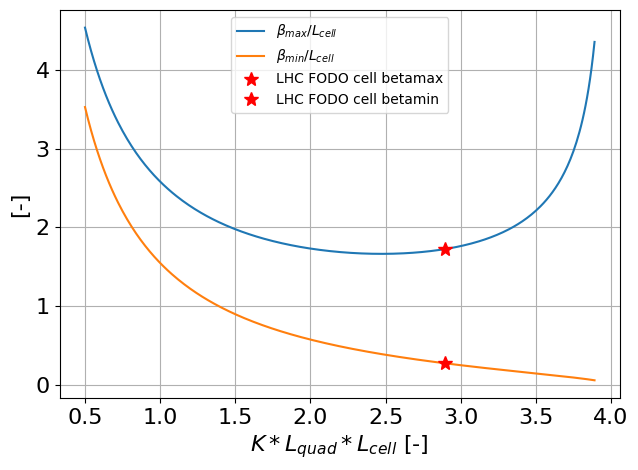

In [10]:
x=np.arange(0.5,3.90,0.01)
betamax=(1+(x/4))/(np.sin(2*np.arcsin(x/4)))
betamin=(1-(x/4))/(np.sin(2*np.arcsin(x/4)))
x_LHC = np.abs(k1l)*FODO_cell_length
betamax_LHC=(1+(x_LHC/4))/(np.sin(2*np.arcsin(x_LHC/4)))
betamin_LHC=(1-(x_LHC/4))/(np.sin(2*np.arcsin(x_LHC/4)))
fig, ax1 = plt.subplots()
ax1.plot(x,betamax,'-',label=r"$\beta_{max}/L_{cell}$")
ax1.plot(x,betamin,'-',label=r"$\beta_{min}/L_{cell}$")
ax1.plot(x_LHC,betamax_LHC, '*', markersize=10, color='red', label='LHC FODO cell betamax')
ax1.plot(x_LHC,betamin_LHC, '*', markersize=10, color='red', label='LHC FODO cell betamin')
ax1.set_ylabel("[-]", fontsize=16)
ax1.set_xlabel("$K*L_{quad}*L_{cell}$ [-]", fontsize=16)
plt.grid()
plt.legend()
plt.tick_params(axis='both', labelsize=16)
plt.tight_layout() 